In [7]:
# Set seed for reporducibility

import random 
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [8]:
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [16]:
fashion_dataset=datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_dataset.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Data processing

In [17]:
type(train_images)

numpy.ndarray

In [18]:
len(train_images)

60000

In [19]:
type(train_labels)

numpy.ndarray

In [20]:
len(train_labels)

60000

In [21]:
type(test_images)

numpy.ndarray

In [22]:
len(test_images)

10000

In [23]:
type(test_labels)

numpy.ndarray

In [24]:
len(test_labels)


10000

In [32]:
print(train_images[0].shape)

(28, 28)


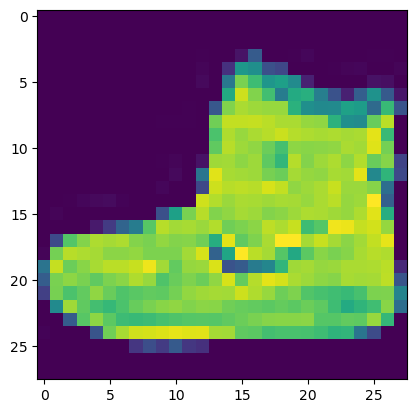

In [31]:
# displaying a sample image
plt.imshow(train_images[0])


In [36]:
# Normalize the pixel value of images

train_images,test_images=train_images/255,test_images/255

In [38]:
# reshape all the images into 28x28 pixel format

train_images=train_images.reshape((train_images.shape[0],28,28,1))
test_images=test_images.reshape((test_images.shape[0],28,28,1))

# Building the CNN

In [39]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10))


C:\Users\ACER\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [41]:
# Complinig the model
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['acc'])

In [42]:
# Model training
history=model.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - acc: 0.7336 - loss: 0.7428 - val_acc: 0.8617 - val_loss: 0.3842
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - acc: 0.8726 - loss: 0.3472 - val_acc: 0.8764 - val_loss: 0.3450
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - acc: 0.8950 - loss: 0.2907 - val_acc: 0.8827 - val_loss: 0.3294
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - acc: 0.9066 - loss: 0.2562 - val_acc: 0.8924 - val_loss: 0.2998
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - acc: 0.9149 - loss: 0.2292 - val_acc: 0.8937 - val_loss: 0.3002


In [43]:
# Model evaluation 
loss,accuracy=model.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8943 - loss: 0.3018


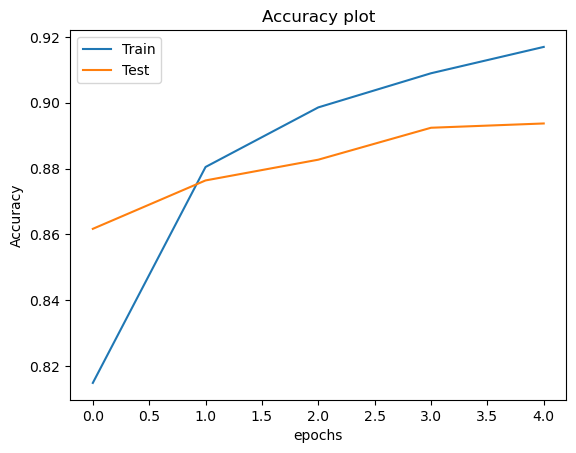

In [46]:
# plotting accuracy and loss
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy plot')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Train','Test'],loc='upper left')


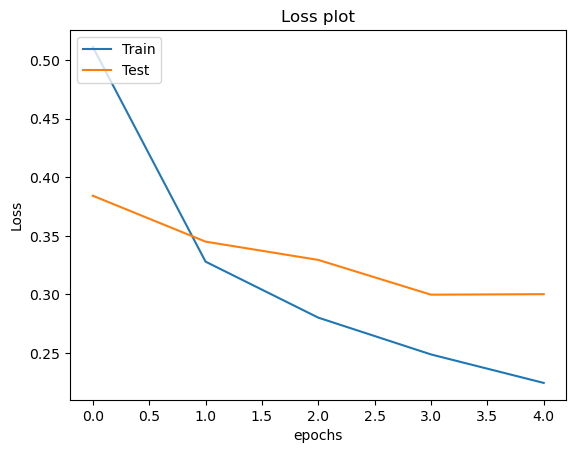

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss plot')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(['Train','Test'],loc='upper left')